# Assignment 2: Clustering

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
data = pd.read_csv("DATA/CC GENERAL.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA

In [3]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
data.median()

BALANCE                              873.385231
BALANCE_FREQUENCY                      1.000000
PURCHASES                            361.280000
ONEOFF_PURCHASES                      38.000000
INSTALLMENTS_PURCHASES                89.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.500000
ONEOFF_PURCHASES_FREQUENCY             0.083333
PURCHASES_INSTALLMENTS_FREQUENCY       0.166667
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          7.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                             856.901546
MINIMUM_PAYMENTS                     312.343947
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
dtype: float64

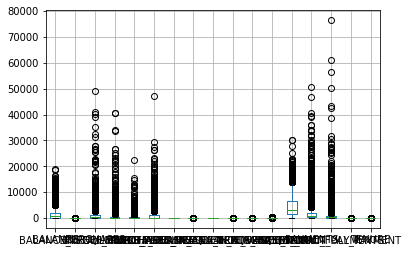

In [5]:
data.boxplot()

There seems to be quite a variance and amount of large outliers, the mean and median discrepencies are large and the stdev is larger than most means. Column "CREDIT_LIMIT" has 1 null variable as seen in the counts and "MINIMUM_PAYMENTS" has many more missing variables. Since "MINIMUM_PAYMENTS" has a much more impact and the column seems to be quite varied high so I will take the median

In [6]:
data_cleaned = data[data.notnull()]
data_cleaned = data_cleaned[data_cleaned['CREDIT_LIMIT'].notnull()]
data_cleaned.loc[(data_cleaned['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=data_cleaned['MINIMUM_PAYMENTS'].median()

#how much did we remove
print('removed in Null values: ', data['CUST_ID'].count() - data_cleaned['CUST_ID'].count())

removed in Null values:  1


## Dealing with Outliers

There are many columns and removing based on Boxplot quartiles would result into removing majority of the data. We need a more scientific approach to remove the true outliers that are not influenced by the low outliers. 

In [7]:
# iterate through each column to remove outliers for each column resulted in rows with out outliers
data_outlier = data_cleaned

for i in data_outlier.drop(columns=['CUST_ID']): 
    mean = data_outlier[i].mean()
    std = data_outlier[i].std()

    data_outlier = data_outlier[(data_outlier[i] <= mean + 3*std) | (data_outlier[i] >= mean - 3*std) ]

#how much did we remove
print('removed in outlier: ', data_cleaned['CUST_ID'].count() - data_outlier['CUST_ID'].count())

removed in outlier:  0


### Standardize & Normalize the data 

In [8]:
data_headers = data_outlier.drop(columns=['CUST_ID']).columns.tolist() 
# Standardize data
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data_cleaned.drop(columns=['CUST_ID'])) 
  
# Normalizing the Data 
data_normed = normalize(data_scaled) 

data_normed.shape

(8949, 17)

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these grpuops.
* use a Scikit-Learn clustering algorithm of your choice to group the users 
* analyze the key differences between the user groups

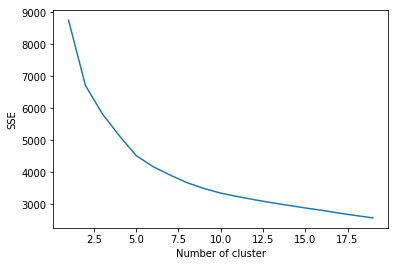

In [9]:
# Using Elbow method to get the best guess of number of clusters that should be used

sse = {}
for k in range(1, 20):
    kmeans = cluster.KMeans(n_clusters=k, max_iter=1000).fit(data_normed)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

The bend in the is around 5-6, we will take 5. Another method may be Silhouette Coefficient Method: in which we could see which scores better againist the model. 

In [10]:
kmean = cluster.KMeans(n_clusters=5)
kmean.fit(data_normed)
labels=kmean.labels_


clusters=pd.concat([pd.DataFrame(data_normed,columns=data_headers), pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,-0.312093,-0.106531,-0.181160,-0.152180,-0.148836,-0.199011,-0.343895,-0.289354,-0.301586,-0.287895,-0.202966,-0.218015,-0.409434,-0.225537,-0.128932,-0.224072,0.153708,1
1,0.219889,0.037460,-0.131226,-0.099752,-0.127041,0.728096,-0.341471,-0.189669,-0.256283,0.160391,0.030749,-0.165391,0.192431,0.228745,0.027234,0.065436,0.100754,4
2,0.126670,0.146770,-0.030522,0.030841,-0.128814,-0.132270,0.359783,0.757482,-0.259859,-0.191346,-0.134899,-0.030909,0.234053,-0.108767,-0.026445,-0.148926,0.102160,0
3,0.020456,-0.424752,0.096822,0.227923,-0.189729,-0.153866,-0.423311,-0.166681,-0.382744,-0.108043,-0.137538,-0.230213,0.344735,-0.249879,-0.095276,-0.219353,0.150471,3
4,-0.151681,0.218943,-0.195321,-0.146806,-0.192156,-0.197312,-0.428726,-0.168814,-0.387641,-0.285437,-0.201234,-0.233158,-0.382706,-0.154036,-0.108755,-0.222159,0.152396,1


In [11]:
# data Visualization of the clusters
dist = 1 - cosine_similarity(data_normed)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8949, 2)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\Program Files (x86)\Microsof

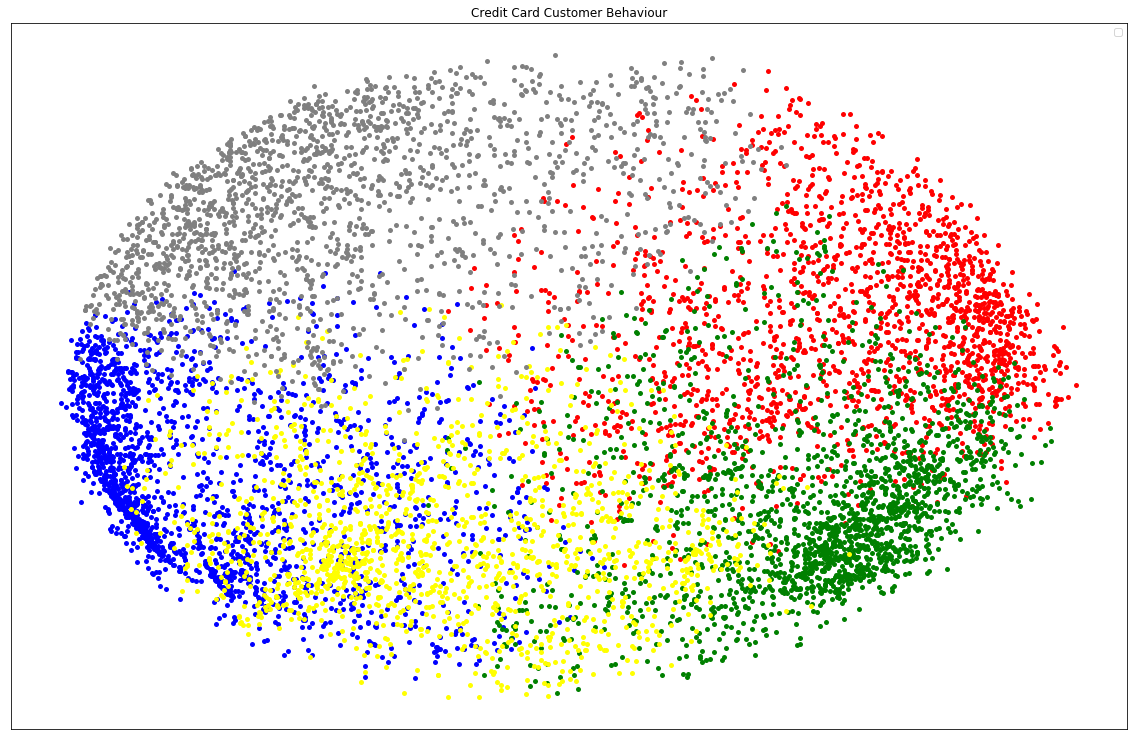

In [12]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'grey',  
          5: 'purple'
}

names = {0: '', 
         1: '', 
         2: '', 
         3: '', 
         4: '',
         5: ''}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Credit Card Customer Behaviour")
plt.show()

## Interpret the Clusters

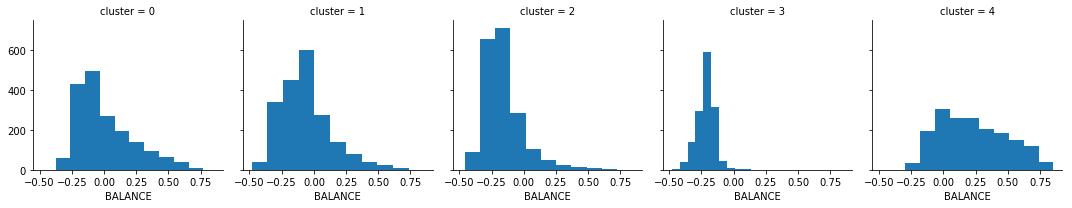

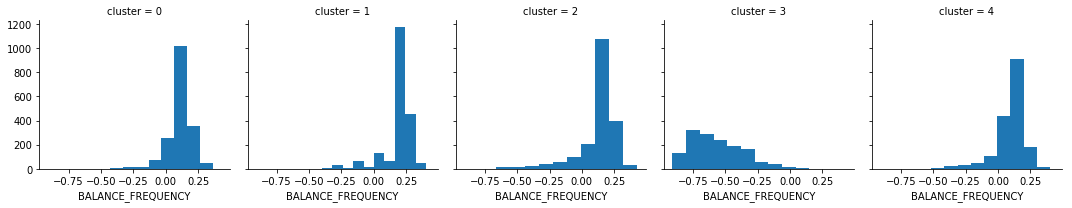

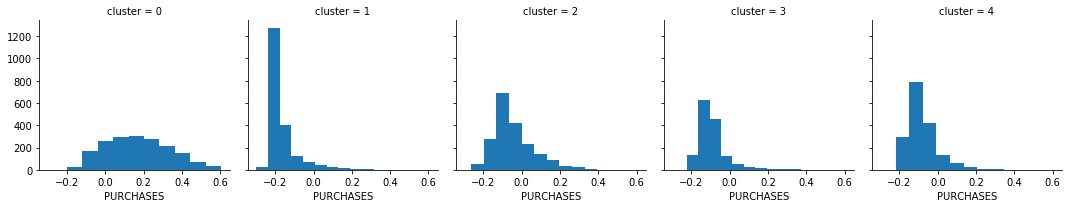

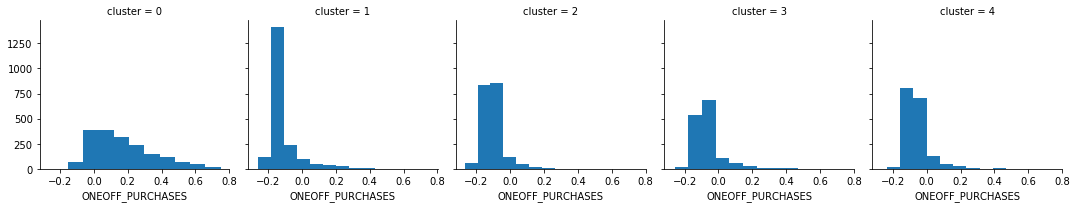

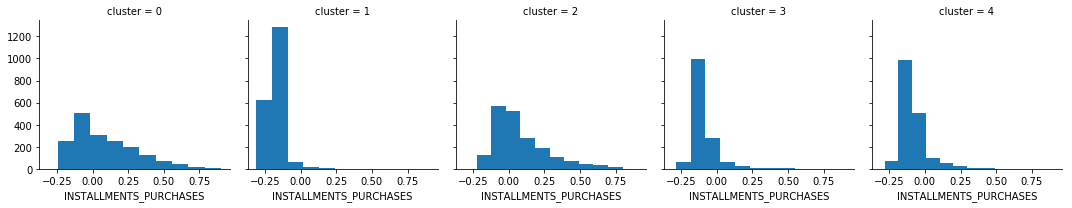

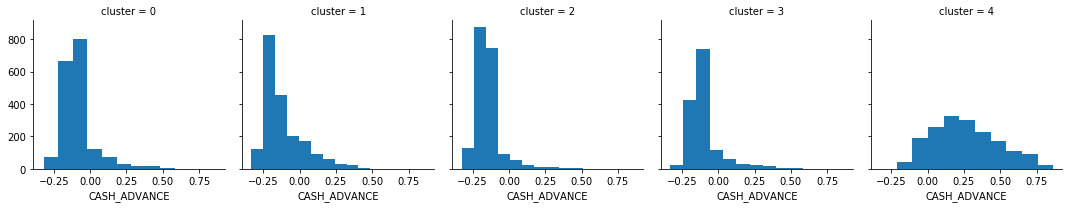

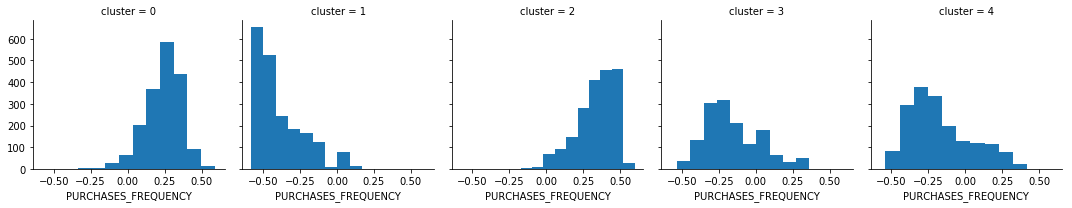

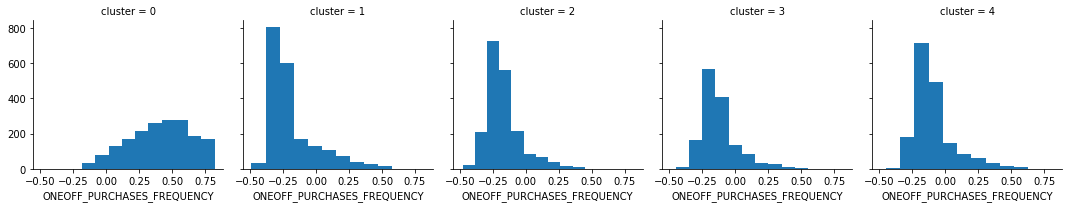

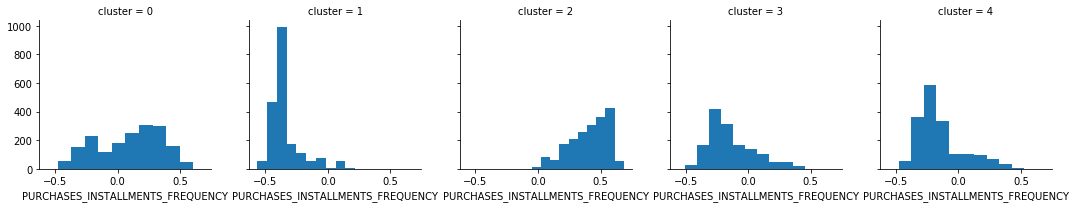

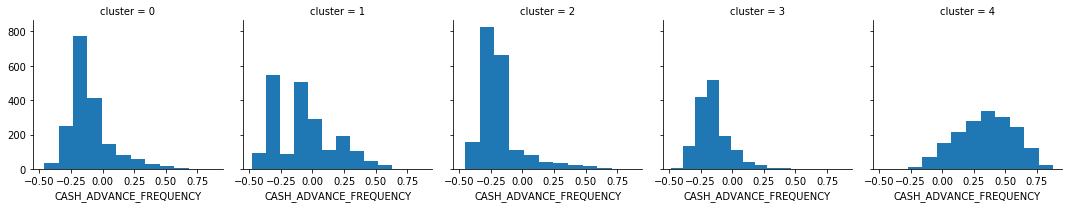

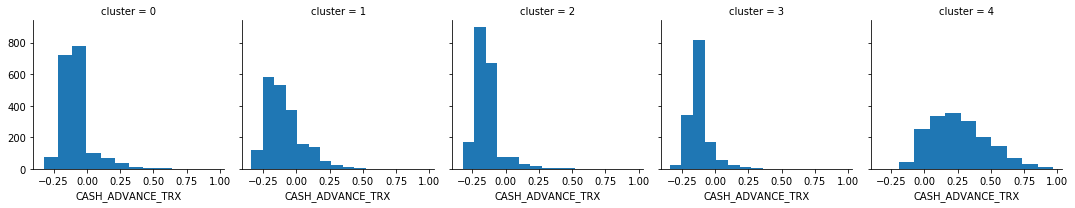

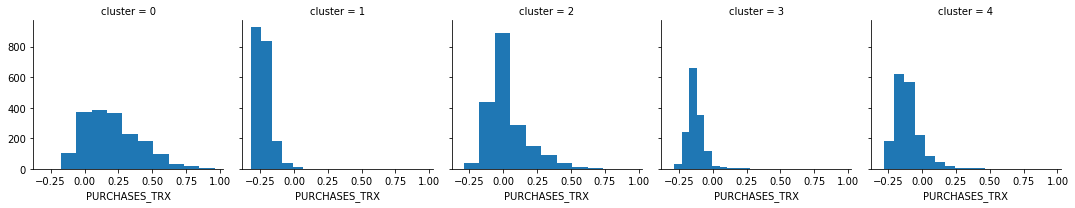

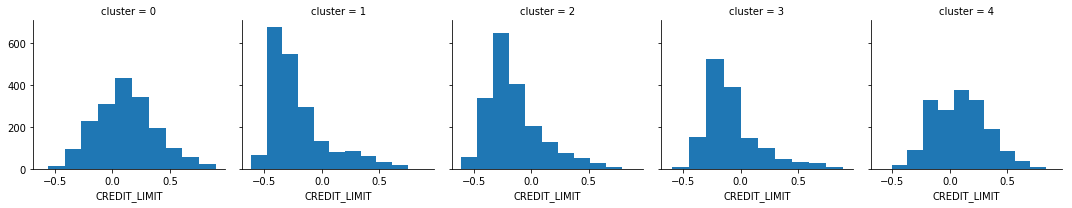

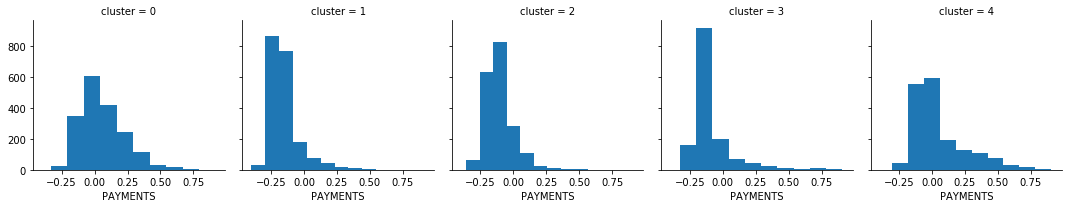

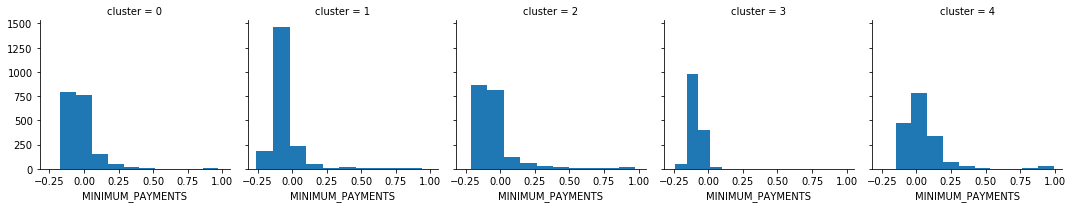

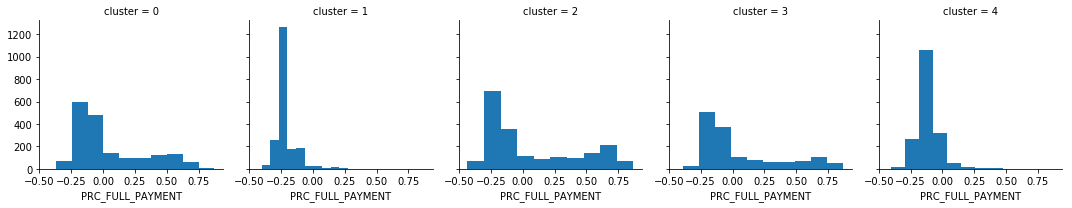

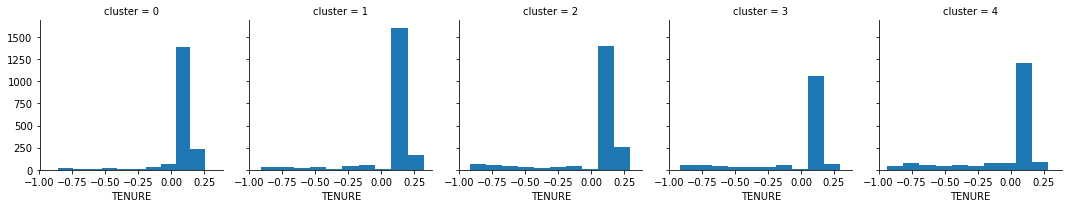

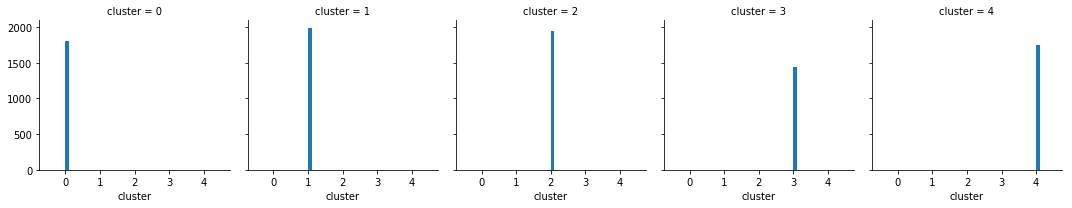

In [13]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Customer 0: Credit Loan Users - Utililzes for larger purchases to slowly payoff with time

Customer 1: Emergency Use Credit Card user - bance and payment remain low due inactivity with the card

Customer 2: Heavy Credit Card User - heacy purchase frequency and balance

Customer 3: Credit Card Safety Net Users: Tend to pay card off and leave balance low resulting in less payments

Customer 4: Cash Advance Card Users, they primarily use the card foe shortage of cash and have higher or more normal distributed curves over Cash related Features